## Extract Data

In [1]:
import csv

with open('data.csv', newline='') as csvfile:
    trainingdata = csv.reader(csvfile, delimiter=',')
    
    i=0
    copydata=[]
    Act={1:[],2:[],3:[],4:[],5:[],6:[]}
    Col=[]
    for row in trainingdata:
        
        if i>0:
            copydata.append(row)
        if i==0:
            Col=row
            #print(str(i)+ ' : ' + '|'.join(row))
            print(Col)
        if 0<i<28:
            Act[int(row[1])].append(row[2])
            
        i = i+1
    
    print(copydata[0])
    #print(Act)
    #print(Col)


['Indnum', 'Group', 'Activity', 'Units', 'Consumption', 'Quality_of_Life_Importance__1_10', 'solar_powered__water_heater', 'gas_water_heater', 'electric_water_heater___peak_hou', 'electric_water_heater___off_peak', 'gas', 'natural_gas', 'hybrid', 'electric___peak_hours', 'electric___off_peak_hours', 'jetfuel']
['1', '1', 'Household heating => 70F', 'hours', '2', '88', '', '', '', '', '', '1', '', '', '', '']


## Average and Variance

In [10]:
def getavg(listofstr, col, act):
    total=0
    cnt=0
    for row in listofstr:
        if row[2]==act and row[col]!='':
            total += int(row[col])
            cnt += 1
    return (total/cnt)

def getVar(datatable, col, act):
    avg = getavg(datatable,col,act)
    total=0
    cnt=0
    for row in datatable:
        if row[2]==act and row[col]!='':
            dev = int(row[col]) - avg
            total += dev*dev
            cnt += 1
    return (total/cnt)

print(getavg(copydata,5,Act[1][2]),Act[1][2])
print(getVar(copydata,5,Act[1][2]))

47.575848303393215 Use of heat pump
21.42987577738734


## Plotting

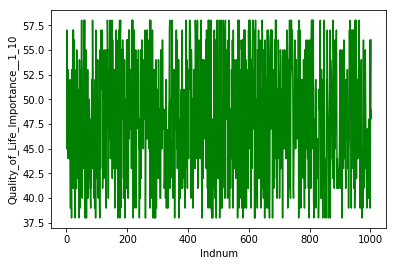

In [3]:
from matplotlib import pyplot as plt

%matplotlib inline

ydata = [ int(row[5]) for row in copydata if row[5]!="" and row[2]==Act[1][3]]
xdata = [ int(row[0]) for row in copydata if row[5]!="" and row[2]==Act[1][3]]

plt.plot(xdata, ydata, color='green', linestyle='solid')
plt.ylabel(Col[5])
plt.xlabel(Col[0])
plt.show()

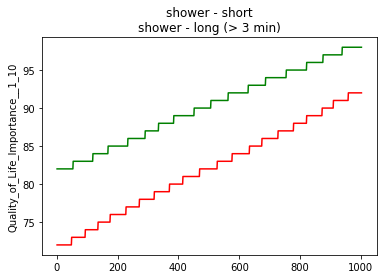

In [4]:
#xdata = [ int(row[0]) for row in copydata if row[5]!="" and row[2]==Act[1][2]]
y1 = [ int(row[5]) for row in copydata if row[5]!="" and row[2]==Act[2][0]]
y2 = [ int(row[5]) for row in copydata if row[5]!="" and row[2]==Act[2][1]]
y3 = [ int(row[5]) for row in copydata if row[5]!="" and row[2]==Act[2][2]]
x = range(0,len(y1))

y1 = sorted(y1,reverse=False)
y2 = sorted(y2,reverse=False)
y3 = sorted(y3,reverse=False)

#datasorted = sorted(copydata, key= lambda dat: dat[5])

plt.plot(xdata, y1, color='green',linestyle='solid')
plt.plot(xdata, y2, color='red',linestyle='solid')
plt.ylabel(Col[5])
plt.title(Act[2][0]+'\n'+Act[2][1])
#plt.plot(x,y1,'g',x,y2,'b--o',x,y3,'c*')

plt.show()

## Distribution


OrderedDict([(60, 23), (61, 30), (62, 36), (63, 30), (64, 29), (65, 32), (66, 27), (67, 21), (68, 22), (69, 32), (70, 31), (71, 21), (72, 41), (73, 35), (74, 32), (75, 34), (76, 33), (77, 25), (78, 19), (79, 18), (80, 30), (81, 34), (82, 22), (83, 27), (84, 38), (85, 28), (86, 23), (87, 36), (88, 38), (89, 37), (90, 28), (91, 22), (92, 44), (93, 24)])


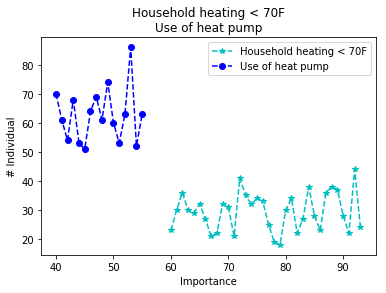

In [5]:
from collections import Counter,OrderedDict

hydrodata = [int(row[5]) for row in copydata if row[5]!="" and row[2]==Act[1][1]]
h2 = [int(row[5]) for row in copydata if row[5]!="" and row[2]==Act[1][2]]

histogram = Counter(Importance for Importance in hydrodata)
histogram = OrderedDict(sorted(histogram.items()))
print(histogram)

h2 = Counter(Importance for Importance in h2)
h2 = OrderedDict(sorted(h2.items()))

plt.plot(histogram.keys(),histogram.values(),'c--*',label=Act[1][1])#,linestyle='solid')
plt.plot(h2.keys(),h2.values(),'b--o',label=Act[1][2])

plt.xlabel('Importance')
plt.ylabel('# Individual')
plt.title(Act[1][1]+'\n'+Act[1][2])
plt.legend()
plt.show()


## Explore data

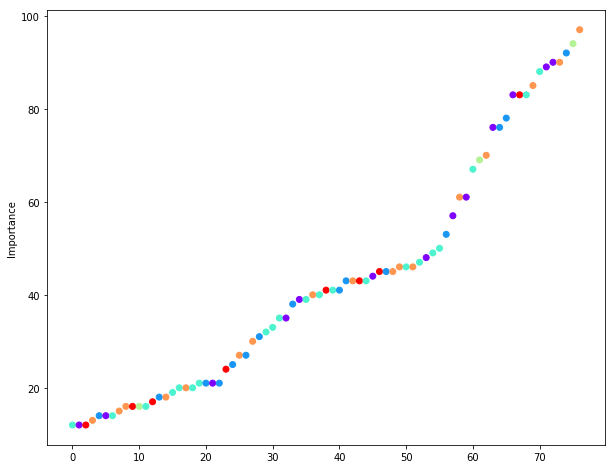

In [6]:
import matplotlib
import numpy as np

copydata = np.asarray(copydata)

# take a random sample of the data to plot
datasubset = copydata[np.random.choice(copydata.shape[0],100,replace=False),:] #print(np.random.choice(copydata.shape[0],100,replace=False))
cleandata = [row for row in datasubset if row[5]!='']

# create a set of colors for the 7 forest cover types
colors = matplotlib.cm.rainbow(np.linspace(0, 1, 6)) #print(colors)
# assign the colors for the groups in the data set 
cs = [colors[int(row[1])-1] for row in cleandata]

xdata = range(0,len(cleandata))
ydata = sorted([int(row[5]) for row in cleandata])

plt.rcParams['figure.figsize'] = [10, 8]
plt.scatter(xdata,ydata,color=cs)

plt.ylabel('Importance')


plt.show()

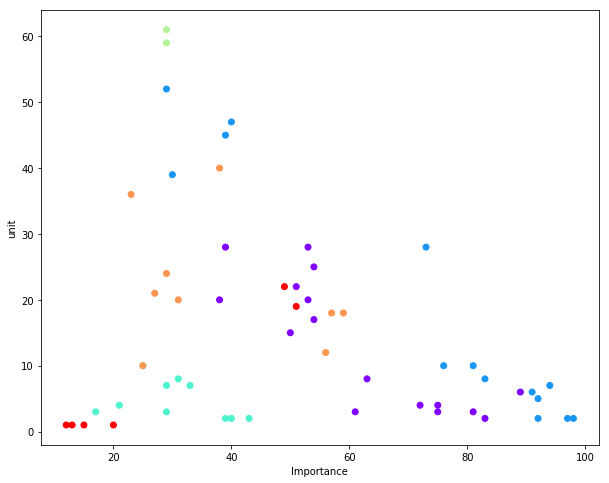

In [7]:
import matplotlib
import numpy as np

copydata = np.asarray(copydata)

# take a random sample of the data to plot
datasubset = copydata[np.random.choice(copydata.shape[0],100,replace=False),:] #print(np.random.choice(copydata.shape[0],100,replace=False))
cleandata = [row for row in datasubset if row[5]!='' and row[4]!='' and int(row[4]) < 100]

# create a set of colors for the 7 forest cover types
colors = matplotlib.cm.rainbow(np.linspace(0, 1, 6)) #print(colors)
# assign the colors for the groups in the data set 
cs = [colors[int(row[1])-1] for row in cleandata]

xdata = [int(row[5]) for row in cleandata]
ydata = [int(row[4]) for row in cleandata]

plt.rcParams['figure.figsize'] = [10, 8]
plt.scatter(xdata,ydata,color=cs)

plt.xlabel('Importance')
plt.ylabel('unit')


plt.show()

cnt: 0


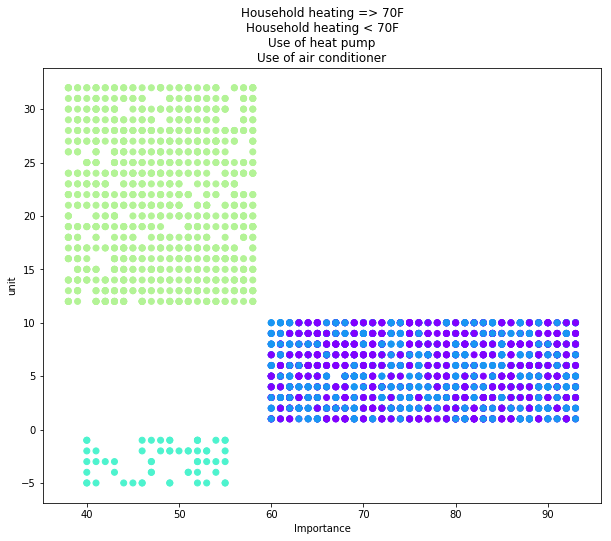

cnt: 0


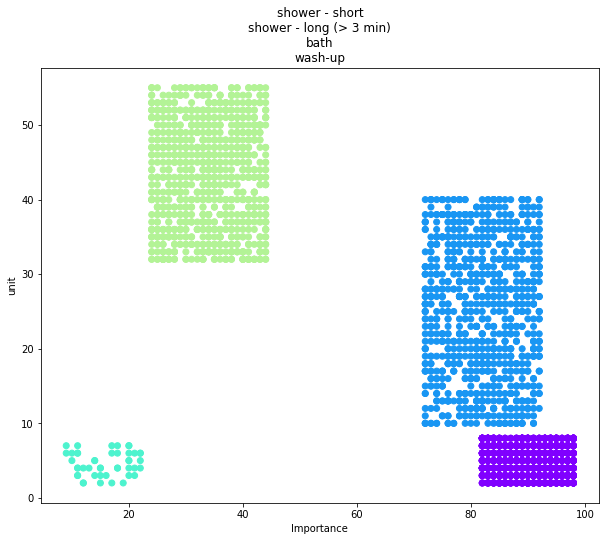

cnt: 0


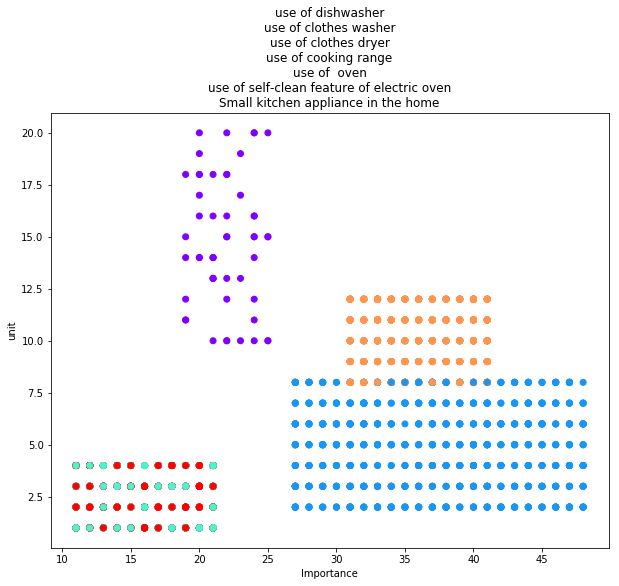

cnt: 0


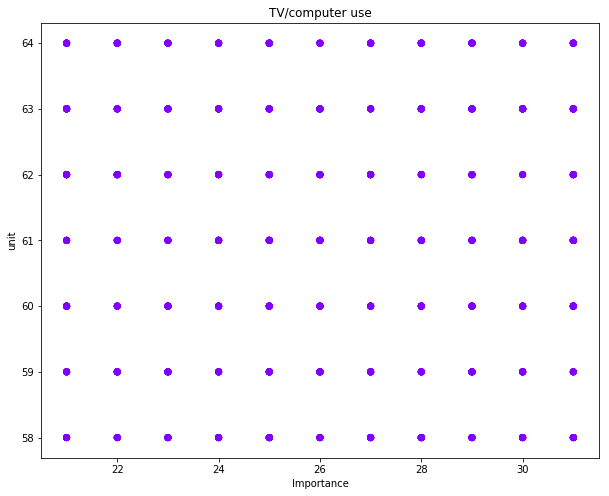

cnt: 0


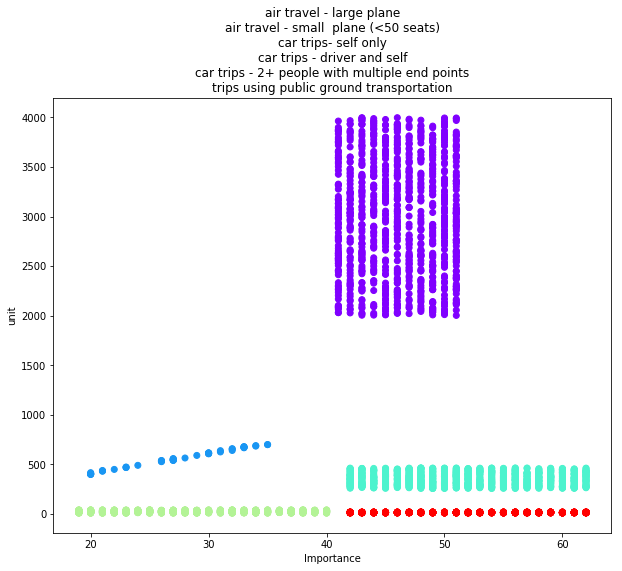

cnt: 0


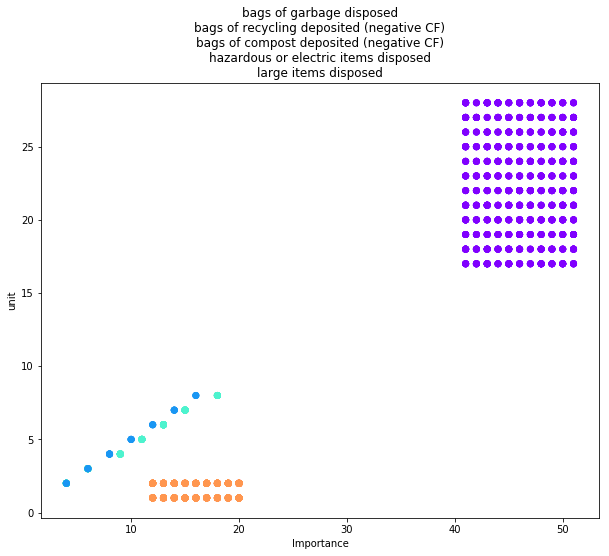

In [8]:
import matplotlib

def Importance_Unit(g_Id):
    # take subset from activities which in group 1
    #datasubset = [row for row in copydata if row[2] in Act[g_Id] and 1000<copydata.index(row)<2000 ]
    datasubset = [row for row in copydata if row[2] in Act[g_Id] ]

    # create a set of colors for the 7 forest cover types
    colors = matplotlib.cm.rainbow(np.linspace(0, 1, 6)) 
    

    cleandata = [row for row in datasubset if row[5]!='' and row[4]!='']
    
    cnt = [1 for row in cleandata if row[5]=='22' and row[4]=='28']
    print('cnt:',len(cnt))
    cs = [colors[Act[g_Id].index(row[2])] for row in cleandata]

    xdata = [int(row[5]) for row in cleandata]
    ydata = [int(row[4]) for row in cleandata]
    
    
    plt.rcParams['figure.figsize'] = [10, 8]
    plt.scatter(xdata,ydata,color=cs)

    plt.xlabel('Importance')
    plt.ylabel('unit')
    plt.title('\n'.join(Act[g_Id]))
    
    plt.show()
    
for i in range(6):
    Importance_Unit(i+1)
    